<a href="https://colab.research.google.com/github/FaragoFa/PDI/blob/main/PDI_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Faragó Facundo - 114462

# ACTIVIDAD PRACTICA 1

## 1) Obtener los 3 canales RGB de una imágen, indicando cómo es la matriz en cada caso.
## 2) Intercambiar los canales de una imágen (R-->G, G-->B, B-->R)
## 3) Convertir una imagen RGB a YIQ
###      a) Modificar los canales YIQ.
###      b) Volver a convertir la imagen a RGB.

# Cargar repositorio

In [1]:
! git clone https://github.com/FaragoFa/PDI.git

Cloning into 'PDI'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


# Función para operaciones con matrices

In [6]:
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

# Importar librerias e Imagen

(256, 256, 3)


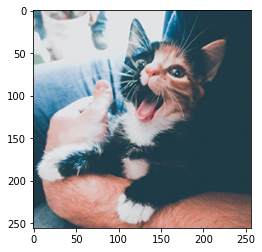

In [2]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.

#Cargo una imagen
img_rgb = imageio.imread('/content/PDI/Tizona256.jpg')/255

#Mostrar imagen
plt.imshow(img_rgb)

print(img_rgb.shape) #Tamaño de la imagen y capas

# Seleccion de canales

## Seleccionar solo el canal rojo

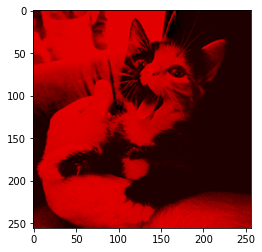

In [70]:
#Creo una matriz de transformación.
M = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]])

img_red = apply_matrix(img_rgb, M)

plt.imshow(img_red)

## Seleccionar solo el canal verde

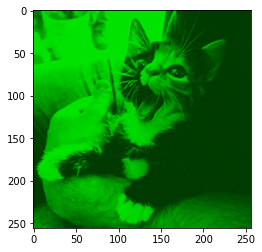

In [71]:
#Creo una matriz de transformación.
M = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])

img_green = apply_matrix(img_rgb, M)

plt.imshow(img_green)

## Seleccionar solo el canal azul

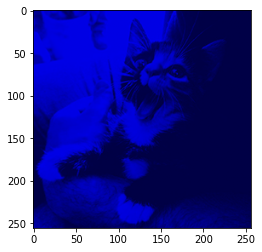

In [72]:
#Creo una matriz de transformación.
M = np.array([[0,0,0],
              [0,0,0],
              [0,0,1]])

img_blue = apply_matrix(img_rgb, M)

plt.imshow(img_blue)

# Intercambio de canales

## R-->G

Text(0.5, 1.0, 'GREEN')

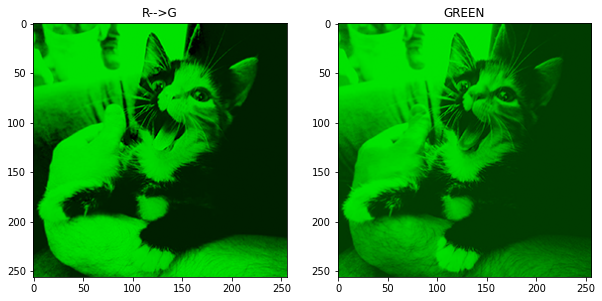

In [84]:
#Creo una matriz de transformación.
M = np.array([[0,0,0],
              [1,0,0],
              [0,0,0]])

img_rg = apply_matrix(img_rgb, M)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_rg, 0, 1))
axes[0].set_title('R-->G')
axes[1].imshow(np.clip(img_green, 0, 1))
axes[1].set_title('GREEN')

## G-->B

Text(0.5, 1.0, 'BLUE')

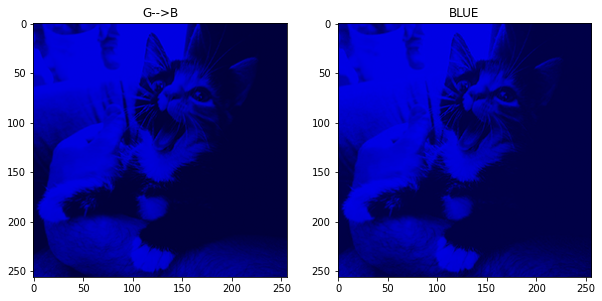

In [83]:
#Creo una matriz de transformación.
M = np.array([[0,0,0],
              [0,0,0],
              [0,1,0]])

img_gb = apply_matrix(img_rgb, M)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_gb, 0, 1))
axes[0].set_title('G-->B')
axes[1].imshow(np.clip(img_blue, 0, 1))
axes[1].set_title('BLUE')


## B-->R

Text(0.5, 1.0, 'RED')

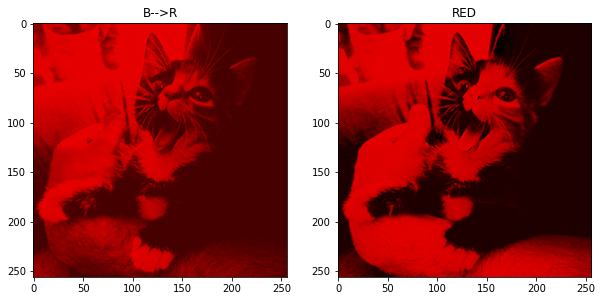

In [82]:
#Creo una matriz de transformación.
M = np.array([[0,0,1],
              [0,0,0],
              [0,0,0]])

img_br = apply_matrix(img_rgb, M)


fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_br, 0, 1))
axes[0].set_title('B-->R')
axes[1].imshow(np.clip(img_red, 0, 1))
axes[1].set_title('RED')


## (R-->G, G-->B, B-->R)

Text(0.5, 1.0, 'RGB')

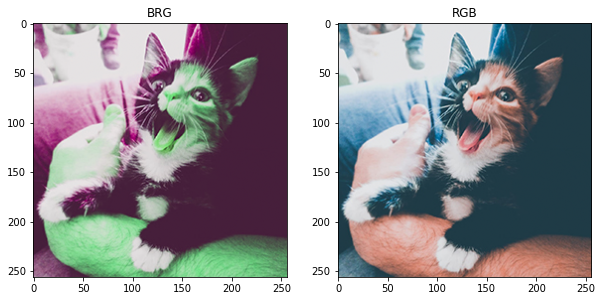

In [87]:
#Creo una matriz de transformación.
M = np.array([[0,0,1],
              [1,0,0],
              [0,1,0]])

img_brg = apply_matrix(img_rgb, M)


fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_brg, 0, 1))
axes[0].set_title('BRG')
axes[1].imshow(np.clip(img_rgb, 0, 1))
axes[1].set_title('RGB')

# YIQ

## RGB a YIQ

Text(0.5, 1.0, 'YIQ')

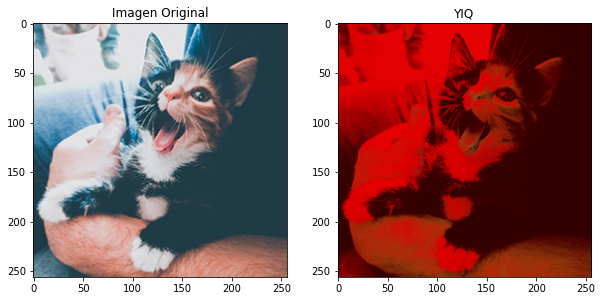

In [138]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

rgb_yiq = apply_matrix(img_rgb, M_YIQ)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen Original')
axes[1].imshow(np.clip(rgb_yiq, 0, 1))
axes[1].set_title('YIQ')


## Modificar canales

Canal Y (Al multiplicarlo por un numero > 1 el brillo sube)

Text(0.5, 1.0, 'Modificada')

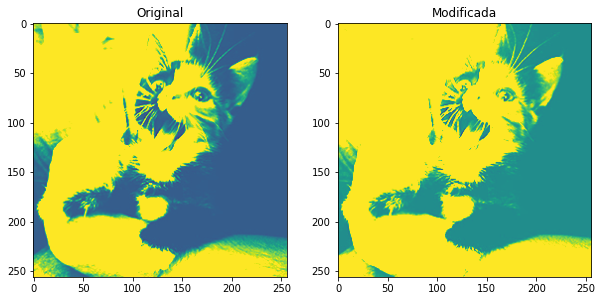

In [109]:
y_channel = rgb_yiq[:,:,0] 
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(y_channel, 0, 1))
axes[0].set_title('Original')
axes[1].imshow(np.clip(y_channel*1.5, 0, 1))
axes[1].set_title('Modificada')

Canal I (pareciera tener un efecto en el contraste, cuanto mayor es la ganancia mas contraste tiene la imagen)

Text(0.5, 1.0, 'Modificada')

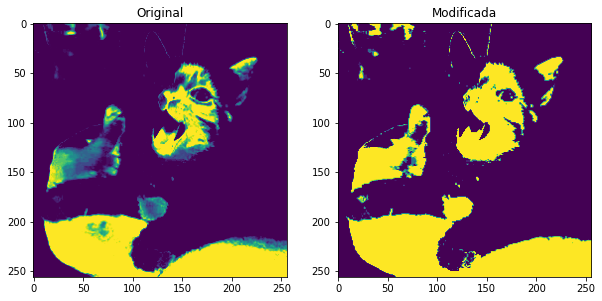

In [110]:
i_channel = rgb_yiq[:,:,1] 
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(i_channel, 0, 1))
axes[0].set_title('Original')
axes[1].imshow(np.clip(i_channel*10, 0, 1))
axes[1].set_title('Modificada')

Canal Q (Aparentemente no cambia nada con la ganancia)

Text(0.5, 1.0, 'Modificada')

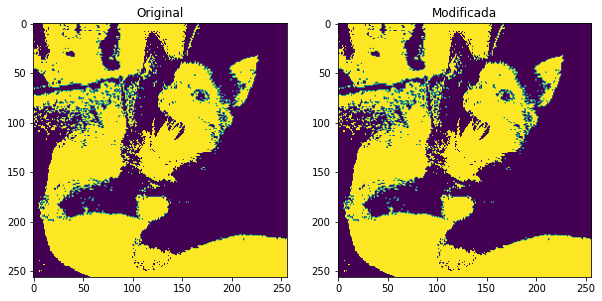

In [127]:
q_channel = rgb_yiq[:,:,2] 
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(q_channel, 0, 1))
axes[0].set_title('Original')
axes[1].imshow(np.clip(q_channel*0.1, 0, 1))
axes[1].set_title('Modificada')

Text(0.5, 1.0, 'Modificada')

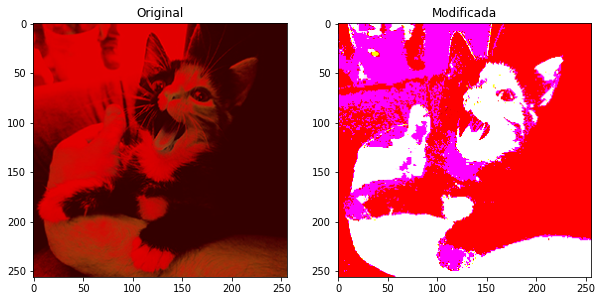

In [139]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(rgb_yiq, 0, 1))
axes[0].set_title('Original')

rgb_yiq[:,:,2] = q_channel*50
rgb_yiq[:,:,1] = i_channel*10
rgb_yiq[:,:,0] = y_channel*2


axes[1].imshow(np.clip(rgb_yiq, 0, 1))
axes[1].set_title('Modificada')

## YIQ a RGB 

Text(0.5, 1.0, 'Modificada')

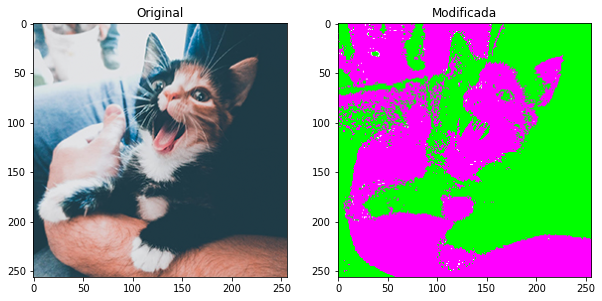

In [140]:
M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

yiq_rgb = apply_matrix(rgb_yiq, M_RGB)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Original')
axes[1].imshow(np.clip(yiq_rgb, 0, 1))
axes[1].set_title('Modificada')


Se puede observar que al modificar la imagen en YIQ y luego volverla RGB, ya casi no se aprecia el contenido de la misma.